## Desafio Codenation: Descubra as melhores notas de matemática do ENEM 2016
Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

* matemática: 3
* ciências da natureza: 2
* linguagens e códigos: 1.5
* ciências humanas: 1
* redação: 3
No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.


## Carregando as bibliotecas

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

/home/felipe/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
from pycaret.regression import * 

## Carregando o dataset

In [31]:
# Dados de treino:
df_train = pd.read_csv('train.csv')
# Dados de teste:
df_test = pd.read_csv('test.csv')

# Criando o dataframe de resposta:
answer = pd.DataFrame()

In [32]:
# Guardando o número da inscrição:
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [33]:
df_train.drop(['NU_INSCRICAO'], axis=1, inplace=True)
df_test.drop(['NU_INSCRICAO'], axis=1, inplace=True)

In [34]:
cols = list(df_test)
cols.append('NU_NOTA_MT')

train = df_train[cols]
test = df_test

In [35]:
train.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,43,RS,24,M,1,1,1,4,1,NaN,...,520.0,D,D,C,A,A,C,H,A,399.4
1,23,CE,17,F,3,1,2,0,2,1.0,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,23,CE,21,F,3,1,3,0,1,NaN,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,33,RJ,25,F,0,1,1,9,1,NaN,...,NaN,H,E,E,C,B,C,F,D,NaN
4,13,AM,28,M,2,1,1,4,1,NaN,...,NaN,E,D,C,A,A,B,F,A,NaN


In [36]:
test.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,41,PR,22,F,3,1,1,5,1,NaN,...,40.0,420.0,B,A,C,A,A,C,C,A
1,21,MA,26,F,3,1,1,8,1,NaN,...,100.0,580.0,E,B,C,B,B,B,F,A
2,23,CE,21,M,1,1,2,0,2,3.0,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,15,PA,27,F,3,1,1,8,1,NaN,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,41,PR,18,M,1,1,2,0,2,1.0,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [37]:
train.shape, test.shape

((13730, 47), (4576, 46))

In [38]:
def info_data(df):
    '''Summary of some dataframe information.'''

    df = pd.DataFrame({'type': df.dtypes,
                       'amount': df.isna().sum(),
                       'percentage': (df.isna().sum() / df.shape[0]) * 100,
                       'unique': df.nunique()})
    return df

In [39]:
info_data(train)

,type,amount,percentage,unique
CO_UF_RESIDENCIA,int64,0,0.000000,27
SG_UF_RESIDENCIA,object,0,0.000000,27
NU_IDADE,int64,0,0.000000,55
TP_SEXO,object,0,0.000000,2
TP_COR_RACA,int64,0,0.000000,6
TP_NACIONALIDADE,int64,0,0.000000,5
TP_ST_CONCLUSAO,int64,0,0.000000,4
TP_ANO_CONCLUIU,int64,0,0.000000,11
TP_ESCOLA,int64,0,0.000000,4
TP_ENSINO,float64,9448,68.812819,3


/home/felipe/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/felipe/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/felipe/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/felipe/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


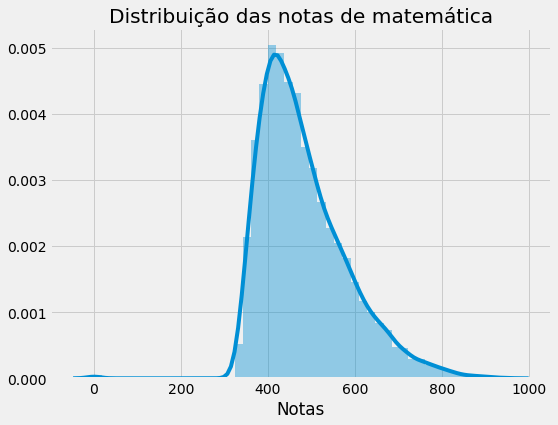

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
sns.distplot(train.NU_NOTA_MT, bins=50)
plt.xlabel('Notas')
plt.title('Distribuição das notas de matemática');

In [42]:
# Estatística descritiva da variável alvo:
train['NU_NOTA_MT'].describe()


count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

Conforme nota a mediana das notas de matemática no exame se encontra entre 461,20 pontos. Bate com as informações do gráfico de distribuição. 

In [44]:
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO', 'NU_NOTA_MT']

In [45]:
traindf[features].corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
NU_NOTA_CN,1.000000,0.969323,0.920917,0.857810,0.907039
NU_NOTA_CH,0.969323,1.000000,0.934704,0.871199,0.903608
NU_NOTA_LC,0.920917,0.934704,1.000000,0.904795,0.943954
NU_NOTA_REDACAO,0.857810,0.871199,0.904795,1.000000,0.875929
NU_NOTA_MT,0.907039,0.903608,0.943954,0.875929,1.000000


Uma surpresa nessa correlação, não esperava que Linguagens e Códigos tivesse a maior correlação com as notas de Matemática. Ciências Naturais era naturalmente esperado a maior correlação, pois envolvem disciplinas de física e quimica, mais próximas a matemática. 

In [40]:
info_data(test)

,type,amount,percentage,unique
CO_UF_RESIDENCIA,int64,0,0.000000,27
SG_UF_RESIDENCIA,object,0,0.000000,27
NU_IDADE,int64,0,0.000000,46
TP_SEXO,object,0,0.000000,2
TP_COR_RACA,int64,0,0.000000,6
TP_NACIONALIDADE,int64,0,0.000000,5
TP_ST_CONCLUSAO,int64,0,0.000000,4
TP_ANO_CONCLUIU,int64,0,0.000000,11
TP_ESCOLA,int64,0,0.000000,3
TP_ENSINO,float64,3096,67.657343,3


## Limpeza dos dados

In [48]:
def cleaning_data(df):
    '''Removing features that are irrelevant to the model.'''

    df.drop(['TP_DEPENDENCIA_ADM_ESC',
             'TP_ENSINO',
             'Q027',
             'CO_PROVA_CN',
             'CO_PROVA_CH',
             'CO_PROVA_LC',
             'CO_PROVA_MT',
             'SG_UF_RESIDENCIA',
             'CO_UF_RESIDENCIA',
             'TP_NACIONALIDADE',
             'IN_BAIXA_VISAO',
             'IN_CEGUEIRA',
             'IN_SURDEZ',
             'IN_DISLEXIA',
             'IN_DISCALCULIA',
             'IN_SABATISTA',
             'IN_GESTANTE',
             'IN_IDOSO',
             'TP_ANO_CONCLUIU',
             'TP_LINGUA',
             'IN_TREINEIRO',
             'TP_ST_CONCLUSAO',
             'TP_STATUS_REDACAO',
             'NU_IDADE'], axis=1, inplace=True)
    return df

In [49]:
#Aplicando a limpeza nos dados:
cleaning_data(train)
cleaning_data(test)
train.shape, test.shape

/home/felipe/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((13730, 23), (4576, 22))

In [50]:
def imput_data(df):
    '''Imputing values ​​to the missing data.'''

    df.fillna(df.dtypes.replace({'float64': 0}), inplace=True)
    return df

In [51]:
imput_data(train)
train.head()

/home/felipe/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,M,1,1,1,1,1,436.3,495.4,581.2,120.0,...,80.0,520.0,D,D,C,A,A,C,A,399.4
1,F,3,2,1,1,1,474.5,544.1,599.0,140.0,...,80.0,580.0,A,A,B,A,A,A,A,459.8
2,F,3,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,D,D,C,A,A,A,A,0.0
3,F,0,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,H,E,E,C,B,C,D,0.0
4,M,2,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,E,D,C,A,A,B,A,0.0


In [52]:
imput_data(test)
test.head()

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,...,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,F,3,1,1,1,1,464.8,443.5,431.8,120.0,...,100.0,40.0,420.0,B,A,C,A,A,C,A
1,F,3,1,1,1,1,391.1,491.1,548.0,120.0,...,120.0,100.0,580.0,E,B,C,B,B,B,A
2,M,1,2,1,1,1,595.9,622.7,613.6,80.0,...,80.0,80.0,320.0,E,E,D,B,B,A,A
3,F,3,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,H,E,G,B,B,A,A
4,M,1,2,1,1,1,592.9,492.6,571.4,100.0,...,80.0,0.0,320.0,D,H,H,C,B,A,A


In [53]:
modelo = setup(data=train, target='NU_NOTA_MT', remove_multicollinearity=True, multicollinearity_threshold=0.95, normalize=True, transform_target=True, session_id=1991)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1991
1,Transform Target,True
2,Transform Target Method,yeo-johnson
3,Original Data,"(13730, 23)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## AVALIAÇÃO DO DESEMPENHO DOS MODELOS

In [54]:
compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,44.655800,4459.375400,66.748800,0.915100,0.237400,0.124000
1,Gradient Boosting Regressor,44.769900,4474.672100,66.864800,0.914800,0.239400,0.124300
2,CatBoost Regressor,44.892100,4492.505500,66.992100,0.914500,0.257400,0.124500
3,Light Gradient Boosting Machine,45.659900,4764.462600,68.994400,0.909300,0.262000,0.126200
4,Random Forest,46.434900,4860.327000,69.694900,0.907500,0.229800,0.129300
5,Bayesian Ridge,47.675300,4925.223400,70.157900,0.906300,0.481900,0.131200
6,Ridge Regression,47.673800,4921.383000,70.130500,0.906300,0.487200,0.131100
7,Least Angle Regression,47.678200,4926.576900,70.167500,0.906200,0.480600,0.131200
8,Support Vector Machine,47.757400,5076.880700,71.228800,0.903400,0.486300,0.131400
9,Extra Trees Regressor,47.591600,5101.191800,71.406200,0.902900,0.221400,0.132800


In [55]:
modelo = create_model('xgboost', fold=5, round=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43.84,4224.51,65.00,0.92,0.21,0.12
1,44.07,4433.01,66.58,0.92,0.26,0.13
2,44.25,4514.95,67.19,0.92,0.27,0.12
3,43.80,4187.02,64.71,0.92,0.19,0.12
4,47.32,4937.39,70.27,0.90,0.25,0.13
Mean,44.66,4459.38,66.75,0.92,0.24,0.12
SD,1.34,268.93,1.99,0.01,0.03,0.00


In [57]:
# Verificando o resultado final após a validação cruzada:
predict_model(modelo);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,44.1729,4344.3731,65.9119,0.9161,0.231,0.1253


In [58]:
predictions = predict_model(modelo, data=test, round=2)
predictions

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,Label
0,F,3,1,1,1,1,464.8,443.5,431.8,120.0,...,40.0,420.0,B,A,C,A,A,C,A,421.119995
1,F,3,1,1,1,1,391.1,491.1,548.0,120.0,...,100.0,580.0,E,B,C,B,B,B,A,438.880005
2,M,1,2,1,1,1,595.9,622.7,613.6,80.0,...,80.0,320.0,E,E,D,B,B,A,A,537.429993
3,F,3,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,H,E,G,B,B,A,A,0.050000
4,M,1,2,1,1,1,592.9,492.6,571.4,100.0,...,0.0,320.0,D,H,H,C,B,A,A,461.880005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,F,1,2,1,1,1,398.3,558.2,511.6,120.0,...,40.0,500.0,E,E,D,A,B,A,A,461.130005
4572,M,2,2,1,1,1,427.6,579.7,471.1,100.0,...,100.0,520.0,C,C,C,A,A,A,A,497.070007
4573,M,1,1,1,1,1,639.2,643.8,604.9,160.0,...,80.0,640.0,D,F,D,B,B,A,D,657.429993
4574,M,2,1,1,1,1,427.1,467.9,540.2,140.0,...,80.0,520.0,C,E,C,A,A,A,A,461.670013


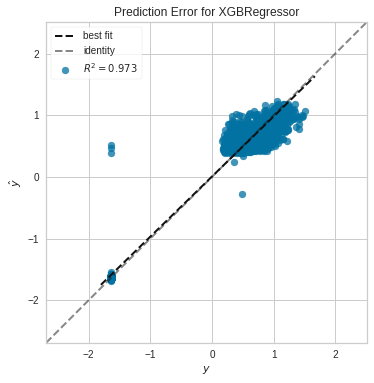

In [60]:
# Prediction Error 
plot_model(modelo, plot='error')

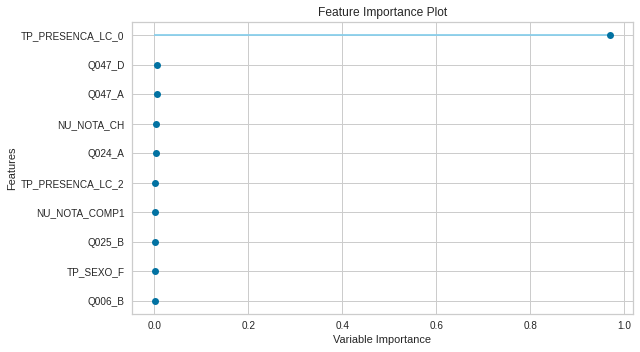

In [61]:
# Feature Importance
plot_model(modelo, plot='feature')

In [62]:
answer = pd.DataFrame({'NU_INSCRICAO':  answer['NU_INSCRICAO'],  'NU_NOTA_MT':predictions['Label'].round(2)})
answer.sample(10)

,NU_INSCRICAO,NU_NOTA_MT
1864,ab73810bdc3e819c4bcea28103c55ac80ea30c03,437.070007
769,094ab89bf55fe688a34a8f6189d20b3a0e8ce9bc,504.829987
4190,b92a00df35857e1e964b609040127c05ced17c99,619.309998
2804,d79709571e24ee9bf8afab33d06eee7929ac0286,438.070007
281,912d751c54b46c860c5ba61666fc6fc59ca2689d,409.480011
821,4b1272abd1c223c6b3866738343d0d1a187bceee,497.209991
1468,09985e3d85e82b3a084a6854d96f6eaaab8d8273,450.329987
1628,77573ac0beae4de1eecd7e4ee31cb7ac0e517a62,425.920013
3506,c65b40029e4b7c845db8e38a9aedee2303926a1e,469.429993
2159,daa134e68ca7728634d98b64cb2df991c738eb93,0.110000


In [63]:
answer.to_csv('answer.csv',index=False,header=True)